# MAPK Feedback Model

This example illustrates loading, and running a kinetic model for a much 
more complex bistable positive feedback system, defined in kkit format.
This is based on Bhalla, Ram and Iyengar, Science 2002.

The core of this model is a positive feedback loop comprising of
the MAPK cascade, PLA2, and PKC. It receives PDGF and Ca2+ as
inputs.

<img src="mapkFB.png" width="35%">

This model is quite a large one and due to some stiffness in its
equations, it takes about 30 seconds to execute. Note that this is still
200 times faster than the events it models.

The simulation illustrated here shows how the model starts out in
a state of low activity. It is induced to 'turn on' when a
a PDGF stimulus is given for 400 seconds, starting at t = 500s.
After it has settled to the new 'on' state, the model is made to
'turn off' by setting the system calcium levels to zero. This inhibition starts at 
t = 2900 and goes on for 500 s. 

Note that this is a somewhat unphysiological manipulation!
Following this the model settles back to the same 'off' state it was in 
originally.


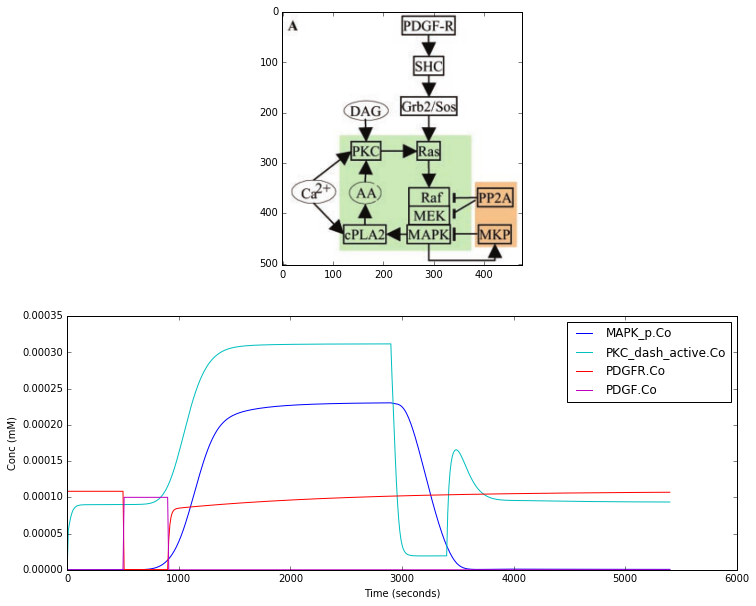

In [2]:
#########################################################################
## This program is part of 'MOOSE', the
## Messaging Object Oriented Simulation Environment.
##           Copyright (C) 2014 Upinder S. Bhalla. and NCBS
## It is made available under the terms of the
## GNU Lesser General Public License version 2.1
## See the file COPYING.LIB for the full notice.
#########################################################################

%matplotlib inline

import moose
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab
import numpy
import sys
import os

scriptDir = os.path.dirname('.')

def main():
    """
This example illustrates loading, and running a kinetic model
for a bistable positive feedback system, defined in kkit format.
This is based on Bhalla, Ram and Iyengar, Science 2002.

The core of this model is a positive feedback loop comprising of
the MAPK cascade, PLA2, and PKC. It receives PDGF and Ca2+ as
inputs.

This model is quite a large one and due to some stiffness in its
equations, it runs somewhat slowly.

The simulation illustrated here shows how the model starts out in
a state of low activity. It is induced to 'turn on' when a
a PDGF stimulus is given for 400 seconds.
After it has settled to the new 'on' state, model is made to
'turn off'
by setting the system calcium levels to zero for a while. This
is a somewhat unphysiological manipulation!

    """

    solver = "gsl"  # Pick any of gsl, gssa, ee..
    #solver = "gssa"  # Pick any of gsl, gssa, ee..
    mfile = ('./acc35.g' )
    runtime = 2000.0
    if ( len( sys.argv ) == 2 ):
        solver = sys.argv[1]
    modelId = moose.loadModel( mfile, 'model', solver )
    # Increase volume so that the stochastic solver gssa
    # gives an interesting output
    compt = moose.element( '/model/kinetics' )
    compt.volume = 5e-19

    moose.reinit()
    moose.start( 500 )
    moose.element( '/model/kinetics/PDGFR/PDGF' ).concInit = 0.0001
    moose.start( 400 )
    moose.element( '/model/kinetics/PDGFR/PDGF' ).concInit = 0.0
    moose.start( 2000 )
    moose.element( '/model/kinetics/Ca' ).concInit = 0.0
    moose.start( 500 )
    moose.element( '/model/kinetics/Ca' ).concInit = 0.00008
    moose.start( 2000 )

    # Display all plots.
    img = mpimg.imread( 'mapkFB.png' )
    fig = plt.figure( figsize=(12, 10 ) )
    png = fig.add_subplot( 211 )
    imgplot = plt.imshow( img )
    ax = fig.add_subplot( 212 )
    x = moose.wildcardFind( '/model/#graphs/conc#/#' )
    t = numpy.arange( 0, x[0].vector.size, 1 ) * x[0].dt
    ax.plot( t, x[0].vector, 'b-', label=x[0].name )
    ax.plot( t, x[1].vector, 'c-', label=x[1].name )
    ax.plot( t, x[2].vector, 'r-', label=x[2].name )
    ax.plot( t, x[3].vector, 'm-', label=x[3].name )
    plt.ylabel( 'Conc (mM)' )
    plt.xlabel( 'Time (seconds)' )
    pylab.legend()
    pylab.show()

# Run the 'main' if this script is executed standalone.
if __name__ == '__main__':
        main()
